<h1>1. 주식 시세 구하기</h1>

In [4]:
import yfinance as yf
from pandas_datareader import data as pdr

In [5]:
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS',start= '2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start = '2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,45080.703125,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,45688.730469,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,44212.105469,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,44820.128906,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,44559.542969,10314997
2018-05-14,51000.0,51100.0,49900.0,50100.0,43517.210938,14909272
2018-05-15,50200.0,50400.0,49100.0,49200.0,42735.472656,18709146
2018-05-16,49200.0,50200.0,49150.0,49850.0,43300.062500,15918683
2018-05-17,50300.0,50500.0,49400.0,49400.0,42909.191406,10365440


In [7]:
msft.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,247.399994,257.910004,245.729996,253.919998,253.919998,33339700
2023-03-14,256.750000,261.070007,255.860001,260.790009,260.790009,33620300
2023-03-15,259.980011,266.480011,259.209991,265.440002,265.440002,46028000
2023-03-16,265.209991,276.559998,263.279999,276.200012,276.200012,54768800
2023-03-17,278.260010,283.329987,276.320007,279.429993,279.429993,69492200
2023-03-20,276.980011,277.480011,269.850006,272.230011,272.230011,43466600
2023-03-21,274.880005,275.000000,269.519989,273.779999,273.779999,34558700
2023-03-22,273.399994,281.040009,272.179993,272.290009,272.290009,34873300
2023-03-23,277.940002,281.059998,275.200012,277.660004,277.660004,36610900


In [9]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16',
               '2023-03-17', '2023-03-20', '2023-03-21', '2023-03-22',
               '2023-03-23', '2023-03-24'],
              dtype='datetime64[ns]', name='Date', length=1203, freq=None)

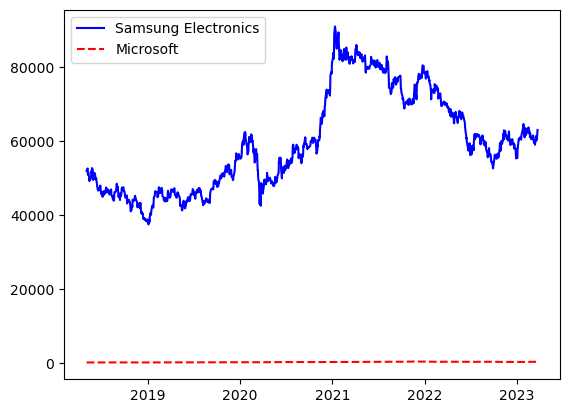

In [10]:
import matplotlib.pyplot as plt
plt.plot(sec.index, sec.Close, 'b', label ='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

삼성전자와 마이크로소프트 주가의 수치 차이가 커서 그래프의 의미가 없어진다

따라서 일간 변동률을 이용하여 비교하는 것이 좋다

<h1>2. 일간변동률로 주가 비교</h1>

In [11]:
sec_dpc = (sec.Close / sec.Close.shift(1) -1 )*100
sec_dpc

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
                ...   
2023-03-20   -1.794454
2023-03-21    0.166113
2023-03-22    1.326700
2023-03-23    1.963993
2023-03-24    1.123596
Name: Close, Length: 1203, dtype: float64

In [12]:
sec_dpc.iloc[0]=0

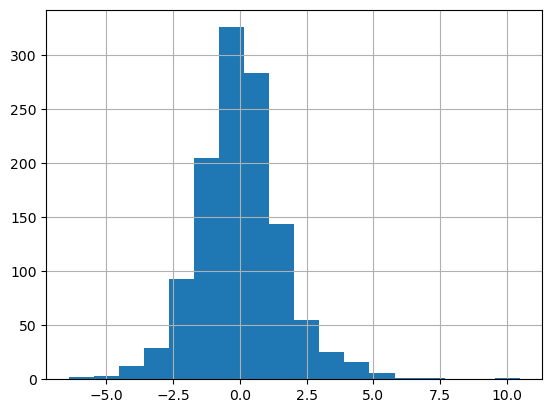

In [14]:
#주간 일간 변동률 히스토그램
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [15]:
sec_dpc.describe()

#삼성전자의 일간변동률 전체 데이터 개수는 1203개, 평균값은 0.02, 표준편차는 1.61 

count    1203.000000
mean        0.029097
std         1.615884
min        -6.387665
25%        -0.980801
50%         0.000000
75%         0.855310
max        10.470588
Name: Close, dtype: float64

In [16]:
#일간변동률 누적합
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs

#조회기간 동안 35.00% 수익을 기록

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2023-03-20    30.423318
2023-03-21    30.589431
2023-03-22    31.916131
2023-03-23    33.880124
2023-03-24    35.003720
Name: Close, Length: 1203, dtype: float64

In [18]:
msft_dpc = (msft.Close / msft.Close.shift(1)-1)*100
msft_dpc.iloc[0]=0
msft_dpc_cs = msft_dpc.cumsum()

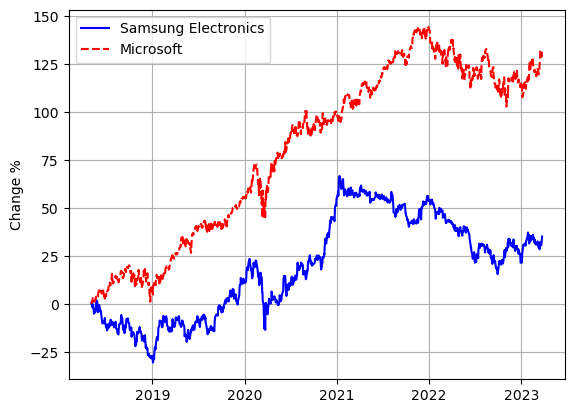

In [19]:
plt.plot(sec.index, sec_dpc_cs,'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs,'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

<h1>3. 최대 손실 낙폭 MDD</h1> 
<br>MDD = (최저점- 최고점)/최고점

In [20]:
kospi = pdr.get_data_yahoo('^KS11','2004-01-04')
window = 252
peak = kospi['Adj Close'].rolling(window, min_periods= 1).max() #1년 단위로 최고치 구하기
drawdown = kospi['Adj Close']/peak -1.0 # 최고치 대비 현재 KOSPI 종가가 얼마나 하락했는지 구하기
max_dd = drawdown.rolling(window, min_periods=1).min() #1년 기간 단위로 최저치 max_dd

[*********************100%***********************]  1 of 1 completed


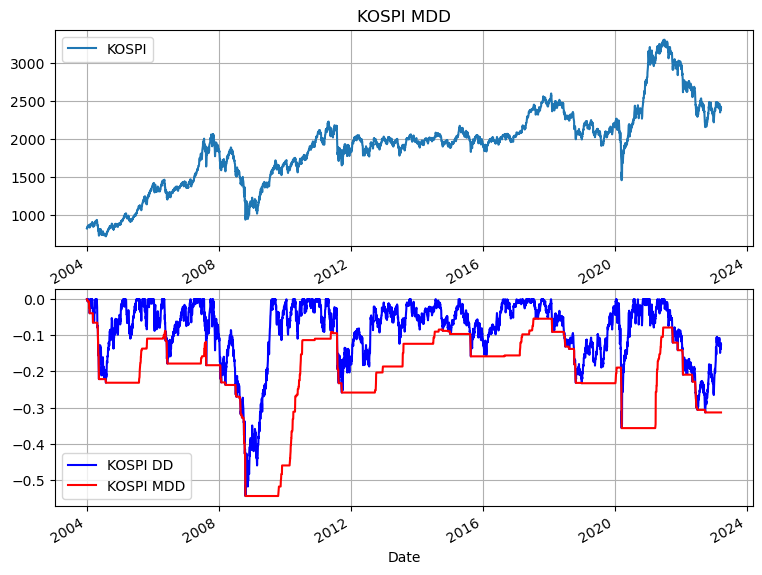

In [24]:
plt.figure(figsize=(9, 7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

<h1>4. 국내 주식과 미국 주식의 상관관계</h1>

In [26]:
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


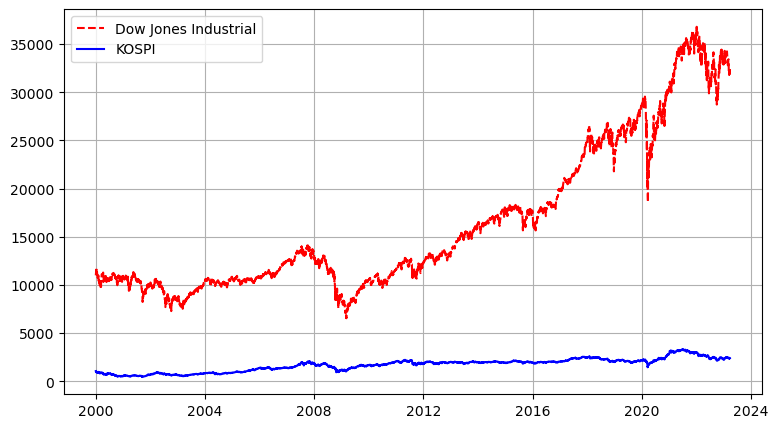

In [27]:
plt.figure(figsize=(9, 5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [28]:
#현재 종가를 특정 시점의 종가로 나누어 변동률 비교 (지수화)
d= (dow.Close / dow.Close.loc['2000-01-04'])*100
k= (kospi.Close / kospi.Close.loc['2000-01-04'])*100

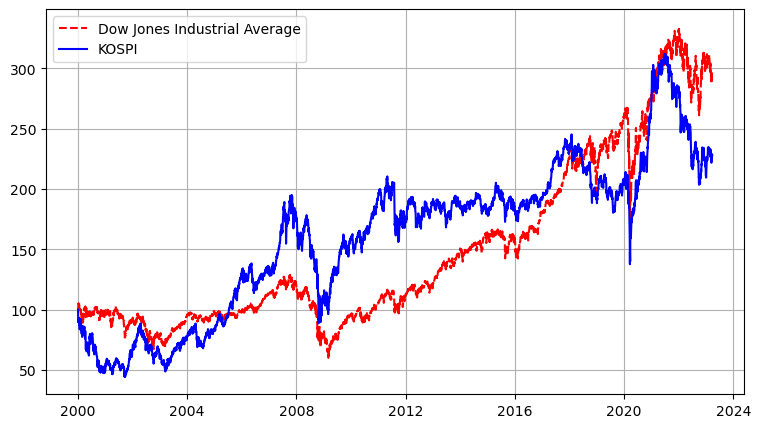

In [29]:
plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [33]:
len(kospi)

5729

In [34]:
len(dow)

5843

In [31]:
#산점도 분석 (x,y 사이즈 동일하게 맞추기)
import pandas as pd
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})
df

,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2023-03-20,32244.580078,2379.199951
2023-03-21,32560.599609,2388.350098
2023-03-22,32030.109375,2416.959961


In [41]:
df = df.fillna(method='bfill') #NaN 뒤에 있는 값으로 NaN을 덮어쓴다
df = df.fillna(method='ffill') #NaN 앞에 있는 값으로 NaN을 덮어쓴다

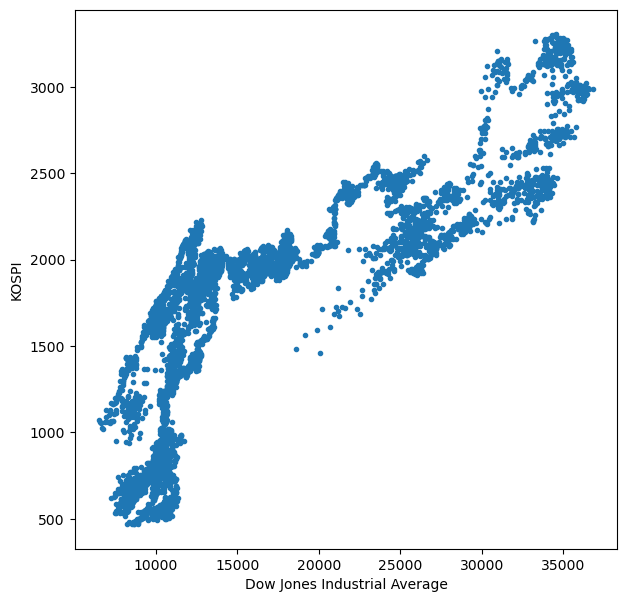

In [42]:
plt.figure(figsize=(7,7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [43]:
#선형회귀분석
from scipy import stats
regr = stats.linregress(df['DOW'],df['KOSPI'])

In [44]:
regr
#E(Y) = 542.72018 + 0.0702262 * x

LinregressResult(slope=0.07022620591521432, intercept=542.7201845475133, rvalue=0.821883521517531, pvalue=0.0, stderr=0.0006272879903161014, intercept_stderr=11.4350049388954)

In [45]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.821884
KOSPI,0.821884,1.000000


In [47]:
r_value = df['DOW'].corr(df['KOSPI']) #r_value

In [48]:
r_squared = r_value **2

In [50]:
r_squared

0.6754925229420576

In [51]:
regr_line = f'Y={regr.slope:.2f} *X +{regr.intercept:.2f}'
regr_line

'Y=0.07 *X +542.72'

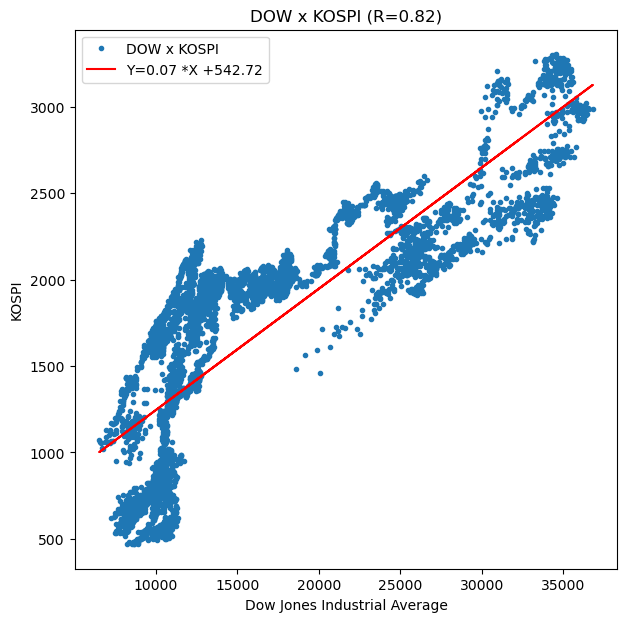

In [52]:
plt.figure(figsize = (7,7))
plt.plot(df.DOW, df.KOSPI,'.')
plt.plot(df.DOW, regr.slope *df.DOW + regr.intercept,'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R={regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()